### 单调栈

## 单调栈和单调队列
#### 单调栈：栈内的元素按照某种方式排序下单调递增或单调递减，如果新入栈的元素破坏的单调性，就弹出栈内元素，直到满足单调性。(下一个最大值，接雨水，最大面积)
#### 单调队列：队列中元素之间的关系具有单调性，而且队首和队尾都可以进行出队操作，只有队尾可以进行入队操作。(滑动窗口最大值)
#### 我的理解(以栈为例):栈中只保存有顺序的数（递增/递减），一旦遇到不符合的数时，就要产生什么操作（比如弹出啥的），但是能保持左边肯定是大于/小于的
#### 参考 [相关题总结](https://blog.csdn.net/Hanx09/article/details/108434955)

### LC. 739 [每日温度](https://leetcode.cn/problems/daily-temperatures/)
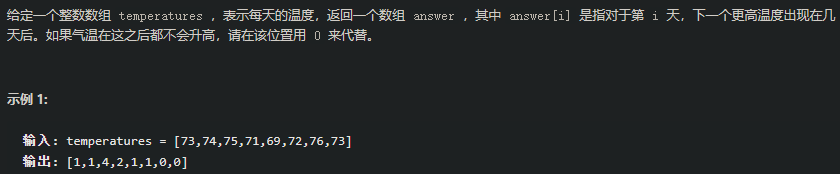

In [1]:
# 用辅助栈来实现单调栈：栈中压入的是[数据，下标]
def lc739(temperatures):
    stack = []
    dic = {} # 收集答案,因为弹栈的时候是乱序的，所以用一个字典记录结果
    res = []
    for i in range(len(temperatures)):
        # 如果不是上一个最大，就压栈[tmp[i],i]  用i辅助
        if not stack or temperatures[i] <= stack[-1][0]:
            stack.append([temperatures[i],i])
        else:
            # 小于他的都弹出
            while stack and temperatures[i] > stack[-1][0]:
                tmp = stack.pop()
                dic[tmp[1]] = i - tmp[1]  
            stack.append([temperatures[i],i])
    # 将最后stack中剩下的值弹出来
    while stack:
        tmp = stack.pop()
        dic[tmp[1]] = 0

    for i in range(len(temperatures)):
        res.append(dic[i])
    return res

# 单调栈：由于下标可以代表数据
def lc739_1(temperatures):
    answer = [0]*len(temperatures)
    stack = [0]
    for i in range(1,len(temperatures)):
        # 情况一和情况二
        if temperatures[i]<=temperatures[stack[-1]]:
            stack.append(i)
        # 情况三
        else:
            while len(stack) != 0 and temperatures[i]>temperatures[stack[-1]]:
                answer[stack[-1]]=i-stack[-1]
                stack.pop()
            stack.append(i)

    return answer
temperatures = [73,74,75,71,69,72,76,73]
lc739(temperatures),lc739_1(temperatures)

([1, 1, 4, 2, 1, 1, 0, 0], [1, 1, 4, 2, 1, 1, 0, 0])

### LC. 496 [下一个更大元素 I](https://leetcode.cn/problems/next-greater-element-i/)
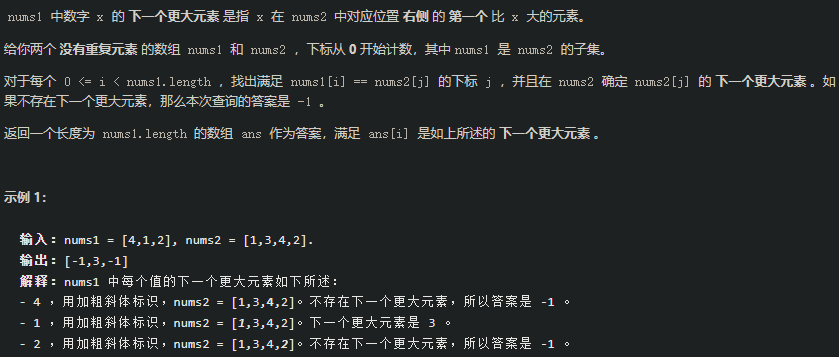

In [2]:
# 类比上一题，只要考虑两次nums就行了（不明白为啥这一个居然是简单题！）
def lc496(nums1,nums2):
    # 单调栈
    res = [-1 for i in range(len(nums2))]
    stack = [0]
    for i in range(1,len(nums2)):
        while stack and  nums2[i] > nums2[stack[-1]]:  # 一旦值大于栈顶的值，找到了相应的元素并记录
            res[stack[-1]] = nums2[i]
            stack.pop()
        else:
            stack.append(i)
    return [res[nums2.index(nums1[i])] for i in range(len(nums1))]
nums1 = [4,1,2];nums2 = [1,3,4,2]
lc496(nums1,nums2)


[-1, 3, -1]

### LC. 503 [下一个更大元素 II](https://leetcode.cn/problems/next-greater-element-ii/)
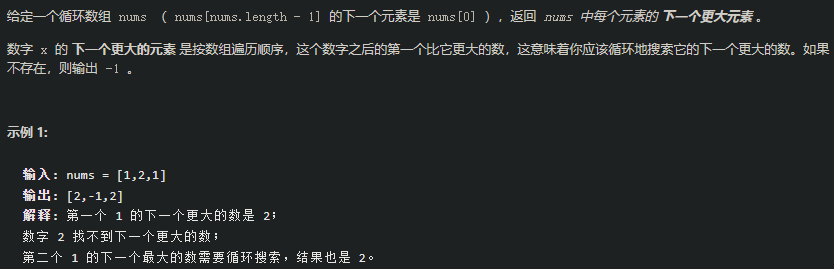

In [3]:
# 同上
def lc503(nums):
    l = len(nums)
    nums = nums + nums[:-1]  # 成环就是两个遍历
    res = [-1 for i in range(len(nums))]
    stack = [0]

    # 单调栈:栈中记录的是数组的下标
    for i in range(1,len(nums)):
        while stack and nums[i] > nums[stack[-1]]:
            tmp = stack.pop()
            res[tmp] = nums[i]
        if not stack or nums[i] <= nums[stack[-1]]:
            stack.append(i)
    return res[:l]
lc503([1,2,1])

[2, -1, 2]

### LC. 42 [接雨水](https://leetcode.cn/problems/trapping-rain-water/)
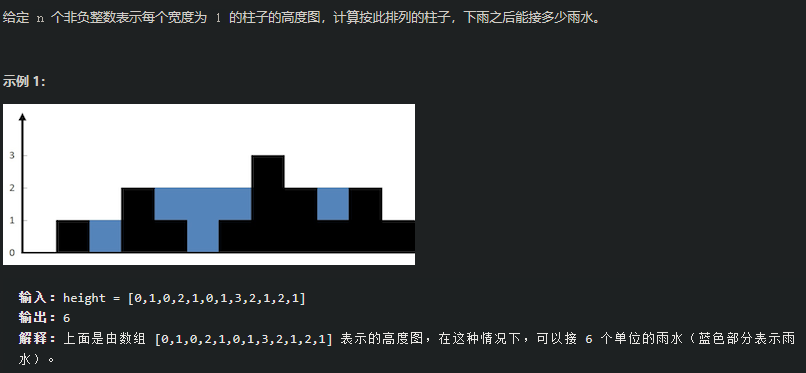

In [4]:
# 经典困难题：递减栈，一旦遇到大的值，就将栈顶的元素弹出来作为凹槽（这一点没想到）/换句话说：找一个较小值的两侧的最大值
def lc42(height):
    # 单调栈： 计算一个盛水的地方需要的要素：左边界，凹槽，右边界
    stack = []
    res = 0
    for i in range(len(height)):
        if not stack or height[i] < height[stack[-1]]:
            stack.append(i)
        # 遇到高度相同的要更新：后面只需一个就行
        elif height[i] == height[stack[-1]]:
            stack.pop()
            stack.append(i)
        else:
            while stack and height[i] > height[stack[-1]]: # 可能有多个凹槽
                # 凹槽的高度
                tmp = stack.pop()
                mid = height[tmp]
                if stack:
                    left = stack[-1]
                    h = min(height[left],height[i]) - mid
                    w = i - left -1
                    # print(i,h*w)
                    res += h*w
            stack.append(i) # 最后要加上i
        # print(stack,res)
    return res
lc42([0,1,0,2,1,0,1,3,2,1,2,1])
# 动态规划版本，之后再说

6

### LC. 84 [ 柱状图中最大的矩形](https://leetcode.cn/problems/largest-rectangle-in-histogram/submissions/)
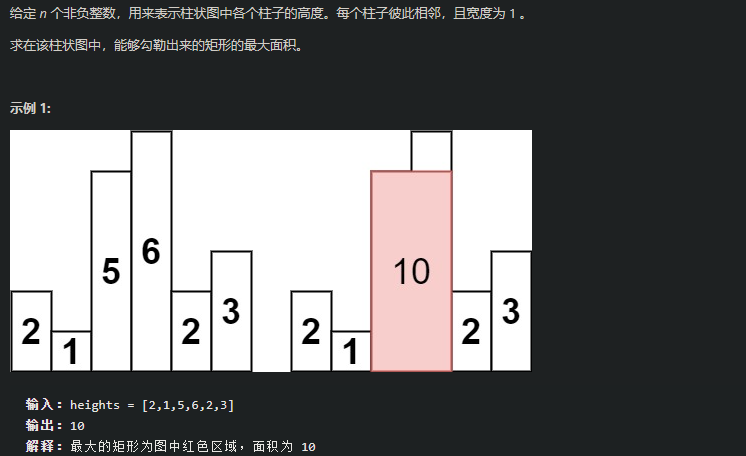

In [5]:
# 和接雨水思路相似，递增栈：找到元素两侧的小于此元素值
def lc84(heights):
    heights = [0] + heights + [0] # 防止数值一样 [1,1,1,1,1]这种
    # 单调栈
    stack = []
    res = 0
    for i in range(len(heights)):
        if not stack or heights[i] >= heights[stack[-1]]:
            stack.append(i)
        else:
            while stack and heights[i] < heights[stack[-1]]:
                tmp = stack.pop()
                h = heights[tmp]
                w = i - stack[-1] - 1  # 找到左边最小的值
                res = max(res,h*w)
                # print(res,h*w,i,tmp,stack)
            stack.append(i)
    return res

lc84([2,1,5,6,2,3])

10

## 单调队列

### LC .239 [滑动窗口最大值](https://leetcode.cn/problems/sliding-window-maximum/)
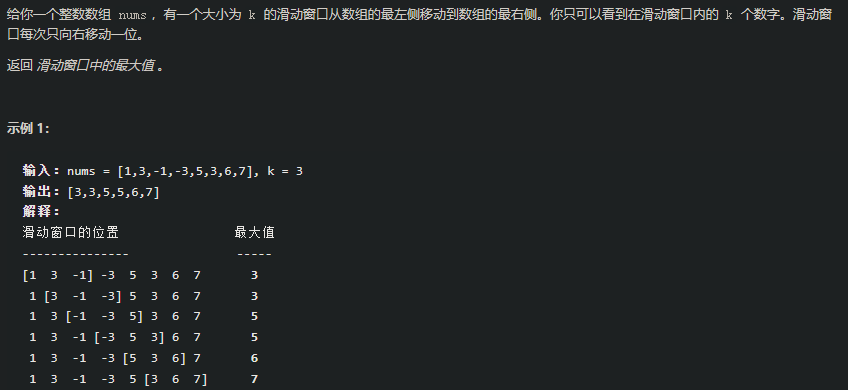
#### 视频讲解 [单调队列正式登场！](https://www.bilibili.com/video/BV1XS4y1p7qj/?spm_id_from=333.788&vd_source=4cb6f65efd49a505c9ea0d90fc91c886)


In [7]:
# 经典困难题：只需要在push的时候保持deq[0]最大（将deq中小于num的数都pop出去），在注意滑动的时候弹出的最大值如果是deq[0]的话要及时更新
def lc239(nums,k):
    # 单调队列
    ### push的时候，将前面小于的都pop出去，保持deq[0]就是最大值
    deq = []
    res = []
    for i,n in enumerate(nums):
        # 小于k的时候
        if i < k:
            while deq and n > deq[-1]:
                deq.pop()
            deq.append(n)
        # 开始滑动
        else:
            s = i - k # 滑动窗口开始的地方
            res.append(deq[0])
            if nums[s] == deq[0]:
                deq.pop(0)
            while deq and n > deq[-1]:
                deq.pop()
            deq.append(n)
        # print(i,deq)
    res.append(deq[0]) # 收集最后一个
    return res
nums = [1,3,-1,-3,5,3,6,7]; k = 3        
lc239(nums,k)

[3, 3, 5, 5, 6, 7]